# Ejercicio 7 Tp2 Análisis de Texto
<b>En este ejercicio se propone verificar la predicción de ley de Zipf. Para ello, descargue desde Project Gutenberg el texto del Quijote de Cervantes10 y escriba un programa que extraiga los términos y calcule sus frecuencias. Calcule la curva de ajuste utilizando la funciópn Polyfit del módulo NymPy11. Con los datos crudos y los estimados grafique en la notebook ambas distribuciones (haga 2 gráficos, uno en escala lineal y otro en log-log). ¿Cómo se comporta la predicción? ¿Qué conclusiones puede obtener? Verifique que el ajuste obtenido se comporta mejor para un rango de valores que excluye los primeros y los últimos datos.</b>

In [72]:
from os.path import isdir
from os import listdir
from tokenizer import tokenizer as t
import numpy as np
from matplotlib import pyplot as plt

### Definición de la función para Extraer los Términos

In [73]:
def get_term_list(dirname, lista_vacias = None):
    '''
    Return:
        - term_list: dict, {token: cf, df}
    '''
    files = listdir(dirname)
    term_list = {}
    for file in files:
        founds_tokens = []
        token_list = []
        if not isdir(dirname+'/'+file):
            with open(dirname+'/'+file,'r', encoding='utf-8', errors='ignore') as f:
                token_list = t.tokenizar_con_regex(f.readlines())
        if not lista_vacias is None:
            token_list = t.sacar_palabras_vacias(token_list, lista_vacias)
        # add tokens in term_list
        for token in token_list:
            if token in term_list:
                cf, df = term_list[token]
                if token not in founds_tokens:
                    df += 1
                    founds_tokens.append(token)
                term_list[token] = cf+1, df
            else:
                term_list[token] = 1, 1
                founds_tokens.append(token)
    return term_list

### Extraer términos y Graficar los datos

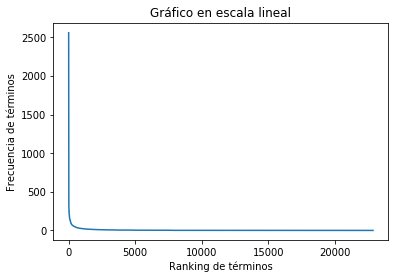

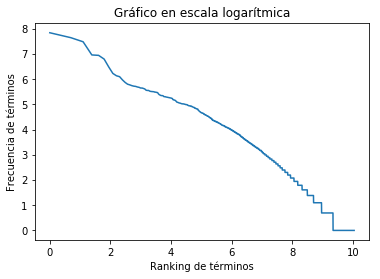

In [74]:
CORPUS_DIRECTORY = 'gutenberg'
STOP_WORDS = 'stop-words.txt'
term_list = []
with open(STOP_WORDS,'r', encoding='utf-8', errors='ignore') as f:
    lista_vacias = t.tokenizar_con_regex(f.readlines())
    term_list = get_term_list(CORPUS_DIRECTORY, lista_vacias)

# Sort terms
x = [] # ranking terms
y = [] # frecuency terms
sorted_terms = sorted(term_list, key=term_list.get, reverse=True)
i = 1
for token in sorted_terms:
    cf, __ = term_list[token]
    y.append(cf)
    x.append(i)
    i += 1
    #outputFile.write(str(token)+'\t'+str(cf)+'\t'+str(df)+'\n')

# Log scale
log_x = np.log(x)
log_y = np.log(y)

# Compute model(curva ajustada) polyfit numpy
# ajuste = np.polyfit(x log, y log, grado del polinomio = 1) retorna los coeficientes del polinomio [coef grado 1 alfa, coef grado 0 c]
ajuste = np.polyfit(log_x, log_y, 1)
rect = np.poly1d(ajuste) #internamente representa un polinomio 

# Plot distribution: escala lineal y logarítmica
plt.title("Gráfico en escala lineal") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(x,y) 
plt.show()

plt.title("Gráfico en escala logarítmica") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(log_x,log_y) 
plt.show()

### Calcular la curva ajustada con la función polyfit del módulo numpy

In [75]:
ajuste = np.polyfit(log_x, log_y, 1) # retorna los coeficientes del polinomio [coef grado 1 alfa, coef grado 0 c]
recta = np.poly1d(ajuste) #internamente representa un polinomio 
print(ajuste)
print(recta)

[-1.06128554 10.39647378]
 
-1.061 x + 10.4


### Calcular las frecuencias (y) predecidas por el modelo ajustado

In [6]:
y_pred = recta(log_x)

### Graficar los datos predecidos por el modelo obtenido

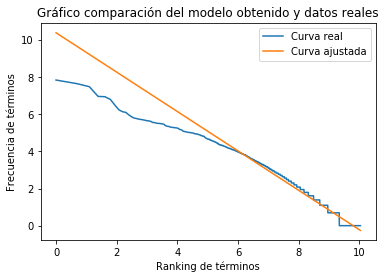

In [7]:
plt.title("Gráfico comparación del modelo obtenido y datos reales") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(log_x, log_y, log_x, y_pred) 
plt.legend(('Curva real', 'Curva ajustada'),
prop = {'size':10}, loc = 'upper right')
plt.show()

### Convertir de escala logarítmica a escala lineal

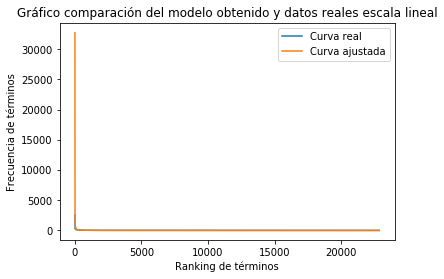

In [38]:
# coef grado 1 beta, coef grado 0 c
beta = ajuste[0]
c = ajuste[1]
lineal_y_pred = []
for n in y_pred:
    f = np.exp(n)
    lineal_y_pred.append(f)
plt.title("Gráfico comparación del modelo obtenido y datos reales escala lineal") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(x, y, x, lineal_y_pred) 
plt.legend(('Curva real', 'Curva ajustada'),
prop = {'size':10}, loc = 'upper right')
plt.show()

### Eliminar el 0.05% de los extremos en los datos

Cantidad de términos totales: 22873
Inicio índice: 1143
Fin índice: 21729
Cantidad de términos sin los extremos: 20586


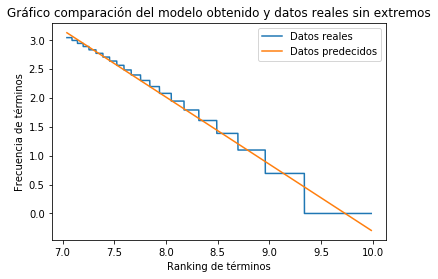

In [39]:
# Ajuste sin valores extremos:
print('Cantidad de términos totales: '+str(len(log_y)))
i_i = int(len(log_x)*0.05)
i_f = int(len(log_x) - len(log_x)*0.05)
print('Inicio índice: '+str(i_i))
print('Fin índice: '+str(i_f))
_log_x = log_x[i_i:i_f]
_log_y = log_y[i_i:i_f]
print('Cantidad de términos sin los extremos: '+str(len(_log_x)))
_ajuste = np.polyfit(_log_x, _log_y, 1) # retorna los coeficientes del polinomio [coef grado 1 alfa, coef grado 0 c]
_recta = np.poly1d(_ajuste) #internamente representa un polinomio 
_y_pred = _recta(_log_x)
plt.title("Gráfico comparación del modelo obtenido y datos reales sin extremos") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(_log_x, _log_y, _log_x, _y_pred) 
plt.legend(('Datos reales', 'Datos predecidos'),
prop = {'size':10}, loc = 'upper right')
plt.show()

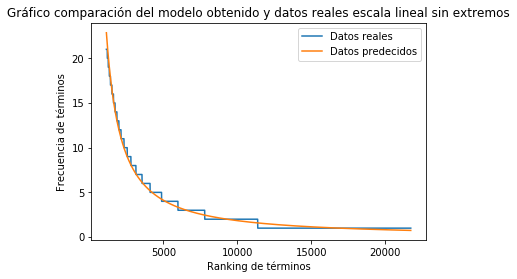

In [76]:
_x = x[i_i:i_f]
_y = y[i_i:i_f]
_lineal_y_pred = []
for n in _y_pred:
    f = np.exp(n)
    _lineal_y_pred.append(f)
plt.title("Gráfico comparación del modelo obtenido y datos reales escala lineal sin extremos") 
plt.xlabel("Ranking de términos") 
plt.ylabel("Frecuencia de términos") 
plt.plot(_x, _y, _x, _lineal_y_pred) 
plt.legend(('Datos reales', 'Datos predecidos'),
prop = {'size':10}, loc = 'upper right')
plt.show()

### Conclusiones
Puede observarse en los gráficos, que el documento dado cumple con la ley de Zipf. Además, se observa que el modelo se ajusta mejor sin los extremos del eje Ranking de Términos. 

# Ejercicio 8 TP2 Análisis de Texto
<b>Usando los datos del ejercicios anterior y de acuerdo a la ley de Zipf, calcule la proporción del total de
términos para aquellos que tienen frecuencia f = {100, 1000, 10000}. Verifique respecto de los valores reales. ¿Qué conclusión puede obtener?</b>

In [49]:
print(ajuste)
print('Valor de alfa: '+str(ajuste[0]))
print('Valor de C: '+str(ajuste[1]))

[-1.06128554 10.39647378]
Valor de alfa: -1.0612855359961137
Valor de C: 10.396473777969149


In [69]:
def get_ranking_by_frecuency(x):
    res = (np.log(x)-c)/beta
    return np.exp(res)

def print_prop(x):    
    frec = get_ranking_by_frecuency(x)
    frec_1 = get_ranking_by_frecuency(x-1)
    print('Ranking de frecuencia '+str(x)+': '+str(frec))
    print('Ranking de frecuencia '+str(x-1)+': '+str(frec_1))
    print('Proporción de terminos con frecuencia '+str(x)+': '+str((int(frec-frec_1)/len(term_list))))
    print('####################################################################################################')

print_prop(100)
print_prop(1000)
print_prop(10000)

Ranking de frecuencia 100: 234.3641307582129
Ranking de frecuencia 99: 236.59409281182488
Proporción de terminos con frecuencia 100: -8.743933895859748e-05
####################################################################################################
Ranking de frecuencia 1000: 26.769339409621917
Ranking de frecuencia 999: 26.794587432367344
Proporción de terminos con frecuencia 1000: 0.0
####################################################################################################
Ranking de frecuencia 10000: 3.057624603684896
Ranking de frecuencia 9999: 3.0579127374117037
Proporción de terminos con frecuencia 10000: 0.0
####################################################################################################


A partir de la salida de la predicción anterior, se observa que solo hay 2 terminos de frecuencia 100, y 1 término para las frecuencias 1000 y 10000.

### Comparar con los datos reales

In [71]:
def get_count_by_frecuency_real(x, y):
    count = 0
    for i in range(0,len(y)):
        if y[i]==x:
            count += 1
    return count
print('Cantidad de términos de frecuencia 100: '+str(get_count_by_frecuency_real(100, y)))
print('Cantidad de términos de frecuencia 1000: '+str(get_count_by_frecuency_real(1000, y)))
print('Cantidad de términos de frecuencia 10000: '+str(get_count_by_frecuency_real(10000, y)))

Cantidad de términos de frecuencia 100: 3
Cantidad de términos de frecuencia 1000: 0
Cantidad de términos de frecuencia 10000: 0


### Conclusión: 
    Al comparar los valores predecidos con los reales, puede decirse que las predicciones son aproximadas. 